**Run the following two cells before you begin.**

In [75]:
%autosave 10

Autosaving every 10 seconds


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(r'https://raw.githubusercontent.com/Sshrut/Data-Science-Intern-2-Mini-Project-Task/master/Task%201%20Data%20set/cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [77]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [80]:
parameters={'max_depth':[3,6,9,12],'n_estimators':[20,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [81]:
from sklearn.model_selection import GridSearchCV
g_s_cv=GridSearchCV(rf,param_grid=parameters,verbose=2,scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [82]:
g_s_cv.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=20, total=   0.5s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=20, total=   0.5s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ..................... max_depth=3, n_estimators=20, total=   0.4s
[CV] max_depth=3, n_estimators=20 ....................................
[CV] ..................... max_depth=3, n_estimators=20, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.4s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  4.8min finished
C:\Users\Shrut-Shah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [83]:
results_gridsearch=pd.DataFrame(g_s_cv.cv_results_)
results_gridsearch.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.454458,0.031667,0.022238,0.003968,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,16,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
1,1.098446,0.156187,0.043980,0.003742,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,13,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,2.437093,0.452203,0.108495,0.024705,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,14,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,4.820217,0.235344,0.225223,0.065849,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,15,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.842948,0.116204,0.031499,0.003777,6,20,"{'max_depth': 6, 'n_estimators': 20}",0.757095,0.762988,0.786057,0.778256,0.771099,0.011585,10,0.802230,0.801523,0.796426,0.799810,0.799998,0.002242


**Find the best hyperparameters from the cross-validation.**

In [84]:
best_parameters=g_s_cv.best_params_
best_parameters

{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [85]:
# Create a 5x5 grid
#x_axis,y_axis=np.meshgrid(results_gridsearch['params'].values,results_gridsearch['mean_test_score'].values)

avg_s=results_gridsearch['mean_test_score'].values
avg_test_score=avg_s.reshape(4,4)
xx,yy=np.meshgrid([0,3,6,9,12],[0,20,50,100,200])
xx.shape

(5, 5)

In [86]:
# Set color map to `plt.cm.jet`
cp=plt.cm.jet

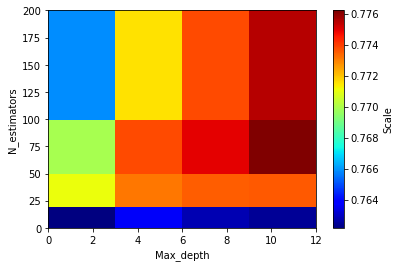

In [87]:
# Visualize pcolormesh
asdf=plt.pcolormesh(xx, yy, avg_test_score, cmap=cp)
plt.xlabel('Max_depth')
plt.ylabel('N_estimators')
plt.colorbar(asdf,label='Scale')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [88]:
# Create a dataframe of the feature names and importance
df_imp_features=pd.DataFrame({'Feature_name':features_response[:-1],'Importance':g_s_cv.best_estimator_.feature_importances_})
df_imp_features.head()

,Feature_name,Importance
0,LIMIT_BAL,0.059961
1,EDUCATION,0.007545
2,MARRIAGE,0.004504
3,AGE,0.026774
4,PAY_1,0.437439


In [89]:
# Sort values by importance
df_imp_features.sort_values(by='Importance',ascending=False)

,Feature_name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
